<a href="https://colab.research.google.com/github/M-Isaiah/Machine_L_R/blob/main/BOD_DATA_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from google.colab import files 
import io
from google.colab import drive
import math
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [ ]:
bod=pd.read_csv('https://raw.githubusercontent.com/M-Isaiah/Machine_L_R/main/bod.csv')

In [ ]:
bod.head(500)

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...
495,2077,MOTICHER LAKE NEAR KAKAARPAR ATOMIC POWER STAT...,GUJARAT,28.4,3.5,8.1,NaN,9.5,0.00,NaN,313.0
496,2078,"KUWADAVA LAKE,VILL KUWADAVA,DIST.RAJKOT",GUJARAT,26.0,5.0,7.6,NaN,8.0,0.00,NaN,200.0
497,3198,"GOMTI LAKE,OPP,RANCHODAJI TEMPLE,DAKOR,KHEDA",GUJARAT,28.0,4.4,8.0,NaN,1.7,0.00,NaN,NaN
498,1979,"OLPAD, VILLAGE POND OLPAD, SURAT",GUJARAT,29.0,5.9,7.8,1453.0,7.3,6.45,30.0,7.0


In [ ]:
bod.describe()

,STATION CODE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
count,534.000000,529.000000,532.000000,534.000000,504.00000,528.000000,532.000000,452.000000,4.950000e+02
mean,2052.516854,25.241399,6.389812,7.798127,684.97619,5.339773,1.378571,7384.170354,1.243970e+05
std,755.217856,3.448013,1.622862,0.649950,1769.32976,8.500504,2.803948,30714.059635,1.458408e+06
min,11.000000,10.500000,0.000000,6.300000,39.00000,0.200000,0.000000,0.000000,1.000000e+00
25%,1363.500000,23.300000,5.575000,7.500000,269.75000,1.600000,0.100000,21.750000,1.285000e+02
50%,2159.500000,25.500000,6.700000,7.900000,377.50000,2.700000,0.600000,405.000000,1.250000e+03
75%,2682.750000,27.600000,7.425000,8.100000,578.50000,5.100000,1.700000,2132.500000,4.919000e+03
max,3330.000000,33.800000,16.300000,14.700000,24062.00000,75.600000,45.500000,310417.000000,2.381667e+07


In [ ]:
bod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATION CODE         534 non-null    int64  
 1   LOCATIONS            534 non-null    object 
 2   STATE                534 non-null    object 
 3   TEMP                 529 non-null    float64
 4   DO                   532 non-null    float64
 5   pH                   534 non-null    float64
 6   CONDUCTIVITY         504 non-null    float64
 7   BOD                  528 non-null    float64
 8   NITRATE_N_NITRITE_N  532 non-null    float64
 9   FECAL_COLIFORM       452 non-null    float64
 10  TOTAL_COLIFORM       495 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 46.0+ KB


From the above information, it is apparent that a few data is missing

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

**DATA PREPROCESSING**
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
#In this section, we drop off the columns which are not of interest and generate a new data frame: bod1, which has the missing values imputed
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
bod.drop(['STATION CODE','LOCATIONS','STATE'],axis=1,inplace=True)
bod1=pd.DataFrame(imputer.fit_transform(bod),columns=bod.columns)

In [ ]:
bod1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TEMP                 534 non-null    float64
 1   DO                   534 non-null    float64
 2   pH                   534 non-null    float64
 3   CONDUCTIVITY         534 non-null    float64
 4   BOD                  534 non-null    float64
 5   NITRATE_N_NITRITE_N  534 non-null    float64
 6   FECAL_COLIFORM       534 non-null    float64
 7   TOTAL_COLIFORM       534 non-null    float64
dtypes: float64(8)
memory usage: 33.5 KB


The above data set is now complete with all the missing values imputed with the mean values of every column.

In [ ]:
bod1

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In [ ]:
#In this section, we standardize  all the values in all the columns to range from 0 to 1, for purpose of TSNE plot in the next section
column_names=['TEMP','DO','pH','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']
data_values=bod1[column_names]
data_values_n=(data_values-data_values.min())/(data_values.max()-data_values.min())

In [ ]:
data_values_n

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,0.802575,0.392638,0.214286,0.028972,0.042440,0.043956,0.000010,3.023093e-06
1,0.600858,0.368098,0.202381,0.009616,0.038462,0.043956,0.000232,7.599720e-06
2,0.656652,0.337423,0.178571,0.013154,0.053050,0.197802,0.000190,5.542337e-06
3,0.613734,0.337423,0.178571,0.013820,0.071618,0.078022,0.000290,1.184045e-05
4,0.652361,0.349693,0.190476,0.010615,0.039788,0.059121,0.000145,5.500350e-06
...,...,...,...,...,...,...,...,...
529,0.545064,0.269939,0.214286,0.020772,0.013263,0.021978,0.000016,5.458363e-07
530,0.532189,0.343558,0.250000,0.022978,0.011936,0.065934,0.000013,2.939118e-07
531,0.532189,0.355828,0.261905,0.022853,0.013263,0.065934,0.000013,2.099370e-07
532,0.781116,0.251534,0.190476,0.045540,0.027851,0.043956,0.000023,2.771169e-06


**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**%

**PRINCIPAL COMPONENT ANALYSIS PCA**


**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data_values_n)
StandardScaler(copy=True,with_mean=True, with_std=True)
scaled_data=scaler.transform(data_values_n)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [ ]:
scaled_data

array([[ 1.15458658,  0.00629549,  0.46489042, ...,  0.22225148,
        -0.2614992 , -0.08863047],
       [-0.21624032, -0.24087797,  0.31088826, ...,  0.22225148,
        -0.25905468, -0.08855276],
       [ 0.16292457, -0.5498448 ,  0.00288394, ...,  2.72577394,
        -0.25951524, -0.08858769],
       ...,
       [-0.6829048 , -0.3644647 ,  1.08089906, ...,  0.57989755,
        -0.26146377, -0.08867823],
       [ 1.00875393, -1.41495192,  0.1568861 , ...,  0.22225148,
        -0.26135749, -0.08863474],
       [-0.27457338, -1.78571211,  1.6969077 , ..., -0.13539458,
        -0.26114492, -0.08850571]])

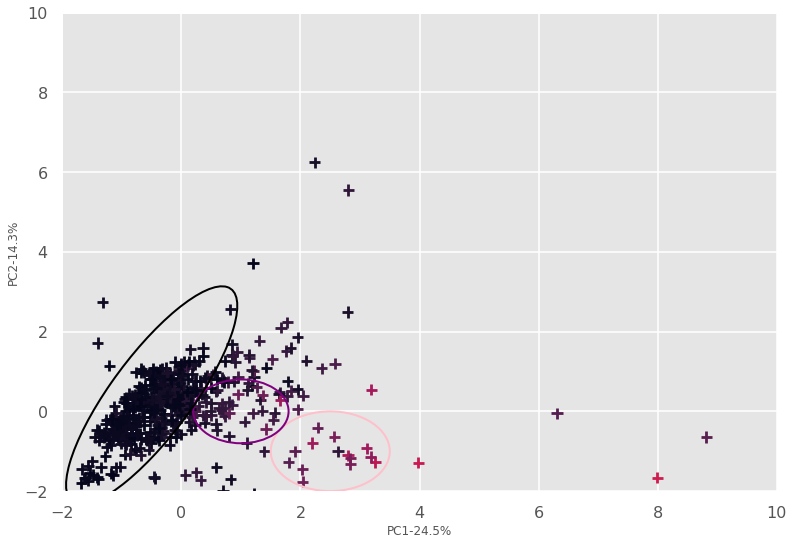

In [ ]:
from matplotlib.patches import Ellipse
from matplotlib import figure
from matplotlib.figure import figaspect
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
plt.scatter(x_pca[:,0],x_pca[:,1],c=data_values_n['BOD'],marker='+')
plt.xlabel('PC1-{0}%'.format(per_var[0]))
plt.ylabel('PC2-{0}%'.format(per_var[1]));
plt.ylim(-2,10);
plt.xlim(-2,10);
plt.savefig('Figx.eps', format='eps')
#plt.title('PRINCIPAL COMPONENT ANALYSIS[PCA] PL');
circle2 = plt.Circle((2.5, -1), 1, color='pink', fill=False,lw=2)
circle3 = plt.Circle((1, 0), 0.8, color='purple', fill=False,lw=2)
ax=plt.gca()
ax.add_patch(circle2)
ax.add_patch(circle3)
ellipse=Ellipse((-0.5,0.4),1.5,6,155, color='black',fill=False,lw=2)
ax.add_patch(ellipse)
plt.savefig('p-c-a.eps', format='eps')

From the PCA plot, there are evident about 3 major clusters based on BOD, with the rest of the points being outliers. 

In [ ]:
pca.explained_variance_ratio_

array([0.24486761, 0.14291644, 0.12746046, 0.12178688, 0.11799686])

In [ ]:
pca.explained_variance_

array([1.9626162 , 1.14547659, 1.02159679, 0.97612299, 0.94574595])

In [ ]:
loadings=pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4','PC5'],index=['TEMP','pH','DO','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM'])
loadings.to_latex('Loading.tex',caption='PCA Loadings ')
files.download('Loading.tex');
loadings

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,PC1,PC2,PC3,PC4,PC5
TEMP,0.114286,0.661805,-0.089545,-0.193298,-0.633749
pH,-0.561666,-0.134170,-0.084175,-0.009250,0.095460
DO,-0.088128,0.186363,-0.577292,0.782199,-0.002400
CONDUCTIVITY,0.163096,0.404647,-0.343859,-0.300595,0.675233
BOD,0.569927,-0.264595,-0.144698,-0.010632,0.091167
NITRATE_N_NITRITE_N,0.399709,0.219923,0.131558,0.147222,0.119660
FECAL_COLIFORM,0.244982,-0.470945,-0.551130,-0.211559,-0.332567
TOTAL_COLIFORM,0.304144,-0.073317,0.437495,0.440242,-0.008576


In [ ]:
!pip install pca;
from pca import pca as pc;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model_pca=pc(n_components=8)
model_results=model_pca.fit_transform(scaled_data)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [ ]:
new_loadings=model_results['loadings'];
new_loadings.columns=['TEMP','pH','DO','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM'];
new_loadings

,TEMP,pH,DO,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
PC1,0.114286,-0.561666,-0.088128,0.163096,0.569927,0.399709,0.244982,0.304144
PC2,0.661805,-0.134170,0.186363,0.404647,-0.264595,0.219923,-0.470945,-0.073317
PC3,-0.089545,-0.084175,-0.577292,-0.343859,-0.144698,0.131558,-0.551130,0.437495
PC4,-0.193298,-0.009250,0.782199,-0.300595,-0.010632,0.147222,-0.211559,0.440242
PC5,-0.633749,0.095460,-0.002400,0.675233,0.091167,0.119660,-0.332567,-0.008576
PC6,-0.146919,-0.023448,0.032063,-0.363921,0.137903,0.591797,-0.198119,-0.660232
PC7,0.062279,0.531259,-0.105637,0.109164,-0.284699,0.615728,0.392584,0.276609
PC8,0.276528,0.606184,-0.014435,-0.027736,0.689739,-0.096030,-0.256357,0.066441


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

DETERMINATION OF NUMBER OF CLUSTERS BY KMEANS CLUSTERING
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
# Determination of the number of clusters on which the data can be clustered. This has been done by Kmeans function through iteration 10 times
from sklearn.cluster import KMeans
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(bod1[['TEMP','pH','DO','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']])
    sse.append(km.inertia_)  

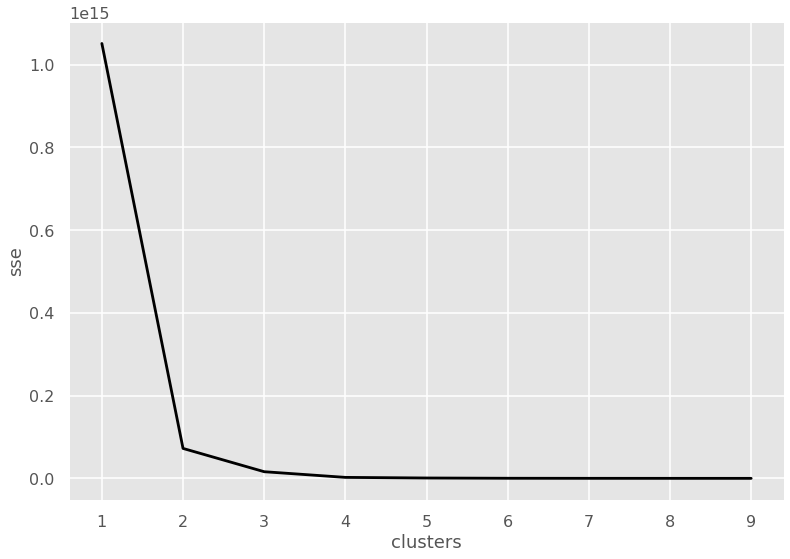

In [ ]:
#Plot for the determination of the K, the number of clusters;
plt.xlabel('clusters',fontsize=18);
plt.ylabel('sse',fontsize=18);
plt.plot(k_rng,sse,color='black');
plt.savefig('kmean-s.eps', format='eps',fontsize=24)
#plt.title('GRAPHICAL DETERMINATION OF K');

From the graph, it is clear that the data can be appropriately clustered into three groups as the value of k=3, based on the elbow rule

**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**%

**T-DISTRIBUTED STOCHASTIC NEIGHBOUR EMBEDDING(TSNE)**


**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

In [ ]:
#iN THIS SECTION, WE CARRY OUT TSNE OPERATION, BY FITTING THE DATA VALUES ABOVE INTO TSNE MODEL, 2D MODEL
from sklearn.manifold import TSNE
tsne=TSNE(n_components=3, random_state=0)
x_bod_2d=tsne.fit_transform(data_values_n)
#We also add this generate set to new columns , named x and y in the bod1 data set
data_values_n['x']=x_bod_2d[:,0]
data_values_n['y']=x_bod_2d[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
#This is the 2D data values which can now be ploted on a TSNE plot
x_bod_2d

array([[ 33.99966  ,  -8.634909 , -51.403618 ],
       [ -8.796336 ,   4.1991606,   1.8170372],
       [ -6.8846874,  51.75776  , -10.609083 ],
       ...,
       [-17.757654 ,  13.930774 ,  21.841076 ],
       [ 12.247427 ,  15.446037 , -37.78208  ],
       [ -6.5157638,  34.56884  ,   4.8686953]], dtype=float32)

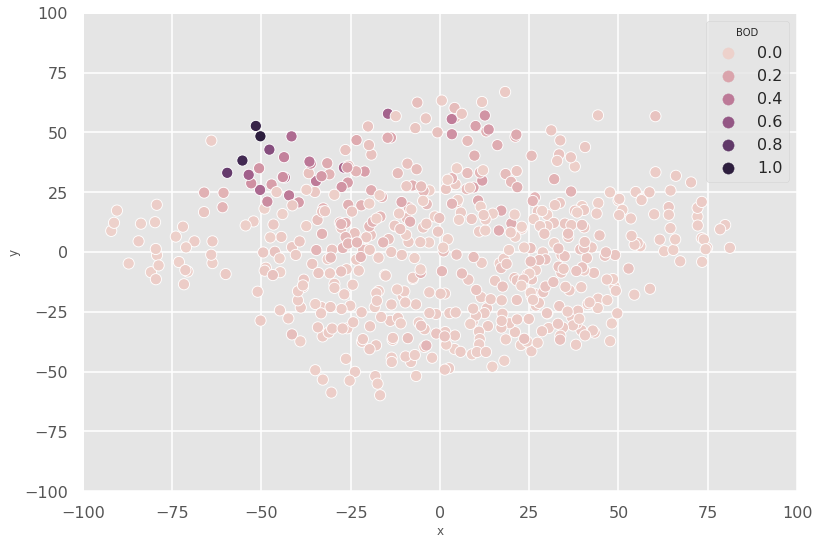

In [ ]:
style.use('ggplot')
sns.scatterplot(x='x',y='y', hue='BOD',data=data_values_n);
sns.set_style("darkgrid");
plt.ylim(-100,100)
plt.xlim(-100,100)
#plt.xlabel("X-Axis",fontsize=20);
#plt.ylabel("Y-Axis",fontsize=20);
#plt.title("t-SNE Plot", fontsize=20);
plt.savefig('t-SNE-1.eps', format='eps')

It is apparent from the t-SNE plot above that the data seems to fall into three major clusters based on the BOD values:0-0.3,0.3-0.7 and 0.7-1.0, which we could easily cluster as : Low, Medium and High BOD,hence we cluster and categorize below:

In [ ]:
#CLUSTERING
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(data_values_n[['TEMP','pH','DO','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']])
data_values_n['Clusters']=y_predicted;

In [ ]:
#CATEGORIZING
rating=[]
for row in data_values_n['Clusters']:
  if row ==0:rating.append('Low')
  elif row ==1:rating.append('Medium')
  else :rating.append('High')
data_values_n['BOD Level']=rating
data_values_n.describe()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,x,y,Clusters
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.632678,0.392013,0.178348,0.026890,0.068167,0.030298,0.023788,0.005223,0.599290,1.686208,0.805243
std,0.147288,0.099375,0.077375,0.071549,0.112102,0.061509,0.091016,0.058952,36.433868,27.837345,0.958565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-92.030777,-59.932587,0.000000
25%,0.549356,0.343558,0.142857,0.009741,0.018568,0.002198,0.000126,0.000006,-25.768636,-19.929192,0.000000
50%,0.639485,0.411043,0.190476,0.014569,0.033156,0.013187,0.002435,0.000061,1.604387,1.721299,0.000000
75%,0.733906,0.453988,0.214286,0.025684,0.066313,0.037363,0.020971,0.000317,28.633381,19.907227,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.201828,192.487946,2.000000


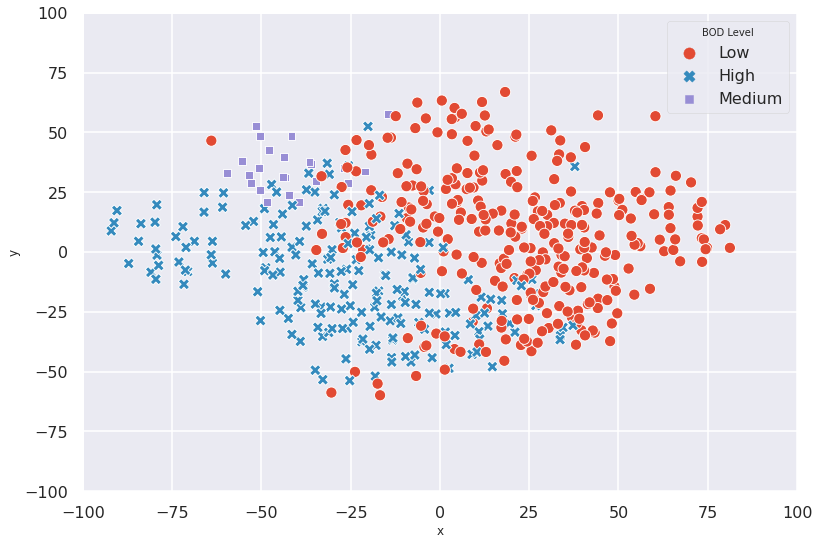

In [ ]:
# Ploting TSNE PLOT with the Categorized Data Set
sns.scatterplot(x='x',y='y', hue='BOD Level',style='BOD Level',data=data_values_n);
sns.set_style("darkgrid");
plt.ylim(-100,100)
plt.xlim(-100,100)
#plt.xlabel("X-Axis",fontsize=20);
#plt.ylabel("Y-Axis",fontsize=20);
#plt.title("t-SNE Plot", fontsize=20);
plt.savefig('t-SNE-2-2.eps', format='eps')

Although the data is differentiated in terms of level of BOD, it is clear that they are closely associated, with very thin separation boundary.

**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

SECOND PLOT OF PCA

In [ ]:
scores=model_results['PC']
scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
1.0,-0.040900,1.101000,-0.214490,0.183109,-0.619184,0.044701,0.104388,0.196941
1.0,-0.108954,0.096912,0.114911,0.411206,0.039453,0.340071,-0.114495,-0.347354
1.0,1.217928,0.868262,0.578501,0.452242,0.115426,1.763374,1.287131,-0.577174
1.0,0.501801,0.205949,0.320438,0.216911,0.088071,0.671896,0.023086,-0.356832
1.0,0.156161,0.381961,0.214536,0.256997,-0.159321,0.430859,-0.025199,-0.376396
...,...,...,...,...,...,...,...,...
1.0,0.143107,0.052489,0.076277,0.517379,0.227862,0.124969,-0.819715,-1.178329
1.0,-0.039912,0.154141,-0.159797,0.984975,0.458356,0.545704,-0.032878,-0.837401
1.0,-0.116434,0.162420,-0.260217,1.104690,0.469684,0.550013,0.012947,-0.756492
1.0,0.731440,1.265962,0.035081,-0.084792,-0.517119,-0.012759,-0.564768,-0.796788


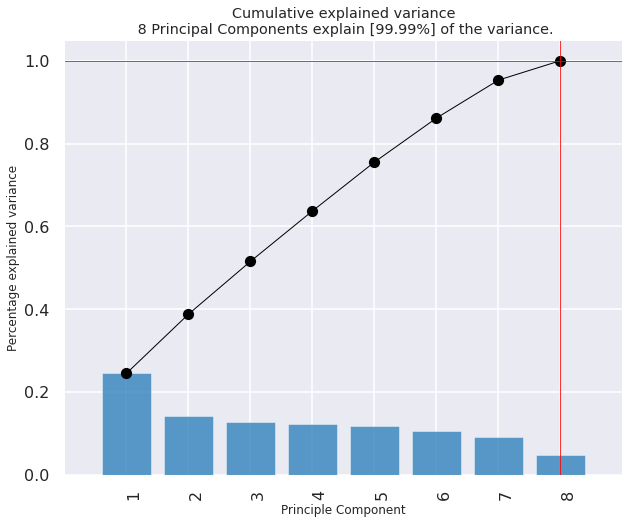

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline 
model_pca.plot(figsize=(10,8))
plt.savefig('scree.eps')

[pca] >Plot PC1 vs PC2 with loadings.


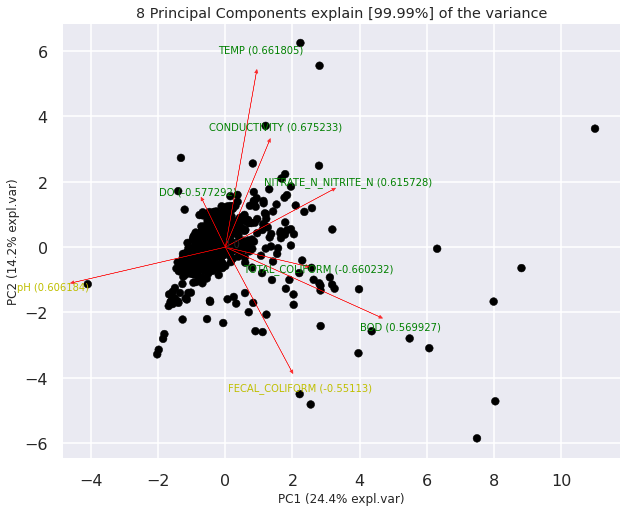

<Figure size 432x288 with 0 Axes>

In [ ]:
model_pca.biplot(n_feat=8,legend=False,figsize=(10,8),label=True,cmap='set2');
plt.show();
plt.savefig('bi-plot.png', format='png');

**DETERMINATION OF THE PEARSON CORRELATION**



**%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

In [ ]:
#In this section, we determine the Perason Correlation, to inform us on whether there are associations between the sets of the data in relation to BOD
bod_corr_data=bod1[['TEMP','pH','DO','CONDUCTIVITY','BOD','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']]
correlation = bod_corr_data.corr()
correlation

,TEMP,pH,DO,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
TEMP,1.000000,0.017788,-0.184776,0.074336,-0.070524,0.088759,0.003681,-0.003061
pH,0.017788,1.000000,0.065572,0.011634,-0.055822,-0.018706,-0.013119,-0.029936
DO,-0.184776,0.065572,1.000000,-0.104975,-0.522361,-0.269114,-0.079518,-0.229604
CONDUCTIVITY,0.074336,0.011634,-0.104975,1.000000,0.098962,0.083578,-0.000954,0.001295
BOD,-0.070524,-0.055822,-0.522361,0.098962,1.000000,0.285053,0.299224,0.173900
NITRATE_N_NITRITE_N,0.088759,-0.018706,-0.269114,0.083578,0.285053,1.000000,0.018370,0.130735
FECAL_COLIFORM,0.003681,-0.013119,-0.079518,-0.000954,0.299224,0.018370,1.000000,0.036039
TOTAL_COLIFORM,-0.003061,-0.029936,-0.229604,0.001295,0.173900,0.130735,0.036039,1.000000


In [ ]:
parameters={'Temp':-0.07,'pH':-0.06,'DO':-0.52,'Conductivity':0.10,'Nitrate_N_Nitrite':0.29,'F.Coliforms':0.30,'T.Coliforms':0.17}
remarks={'Temp':"Small Negative",'pH':"Small Negative",'DO':"High Negative",'Conductivity':"Small Posivtive",'Nitrate_N_Nitrite':"Medium Positive",'F.Coliforms':"Medium Positive",'T.Coliforms':"Small Positive"}

In [ ]:
pearson_corr=pd.DataFrame({'Parameters':parameters,'Corr_Strength':remarks})

In [ ]:
#Pearon Corrrelation with respect to BOD[Biochemical Oxygen Demand]
Table_3=pearson_corr.T
Table_3

,Temp,pH,DO,Conductivity,Nitrate_N_Nitrite,F.Coliforms,T.Coliforms
Parameters,-0.07,-0.06,-0.52,0.1,0.29,0.3,0.17
Corr_Strength,Small Negative,Small Negative,High Negative,Small Posivtive,Medium Positive,Medium Positive,Small Positive


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

CONVERSION OF TABLE_3 and CORRELATION TABLE  TO A LATEX TABLE AND DOWNLOADING
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
Table_3.to_latex('Table_3.tex',caption='Pearson Correlation Results')
#files.download('Table_3.tex');

In [ ]:
correlation.to_latex('Table_4.tex',caption='Pearson Correlation ')
#files.download('Table_4.tex');

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

**MACHINE LEARNING USING THE LINEAR MULTIVARIATE REGRESSION MODEL**

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
bod.describe()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
count,529.000000,532.000000,534.000000,504.00000,528.000000,532.000000,452.000000,4.950000e+02
mean,25.241399,6.389812,7.798127,684.97619,5.339773,1.378571,7384.170354,1.243970e+05
std,3.448013,1.622862,0.649950,1769.32976,8.500504,2.803948,30714.059635,1.458408e+06
min,10.500000,0.000000,6.300000,39.00000,0.200000,0.000000,0.000000,1.000000e+00
25%,23.300000,5.575000,7.500000,269.75000,1.600000,0.100000,21.750000,1.285000e+02
50%,25.500000,6.700000,7.900000,377.50000,2.700000,0.600000,405.000000,1.250000e+03
75%,27.600000,7.425000,8.100000,578.50000,5.100000,1.700000,2132.500000,4.919000e+03
max,33.800000,16.300000,14.700000,24062.00000,75.600000,45.500000,310417.000000,2.381667e+07


In [ ]:
bod1.describe()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
count,534.000000,534.000000,534.000000,534.00000,534.000000,534.000000,534.000000,5.340000e+02
mean,25.241399,6.389812,7.798127,684.97619,5.339773,1.378571,7384.170354,1.243970e+05
std,3.431802,1.619814,0.649950,1718.81514,8.452523,2.798682,28252.825661,1.404038e+06
min,10.500000,0.000000,6.300000,39.00000,0.200000,0.000000,0.000000,1.000000e+00
25%,23.300000,5.600000,7.500000,273.00000,1.600000,0.100000,39.000000,1.400000e+02
50%,25.400000,6.700000,7.900000,389.00000,2.700000,0.600000,756.000000,1.450000e+03
75%,27.600000,7.400000,8.100000,656.00000,5.200000,1.700000,6509.750000,7.544500e+03
max,33.800000,16.300000,14.700000,24062.00000,75.600000,45.500000,310417.000000,2.381667e+07


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import math

In [ ]:
import time
s=time.time()
reg=linear_model.LinearRegression()
acc=0
for i in range(1000000):
      x_train, x_test,y_train,y_test=train_test_split(bod1[['DO','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']],bod1.BOD,test_size=0.10)
      reg.fit(x_train,y_train)
      N_acc=reg.score(x_test,y_test)
      while N_acc>acc:
        acc=N_acc
        q=time.time()
        im=q-s
        print(acc,reg.coef_,reg.intercept_,im)
print(acc,reg.coef_,reg.intercept_)
e=time.time()
t=round((e-s)/60,2)
print(t,'minutes')

0.23596926142351515 [-2.42682125e+00  4.26849957e-01  7.76118351e-05  2.39636612e-07] 19.621712593337506 0.013319015502929688
0.25100885642673887 [-2.34161792e+00  4.60359935e-01  8.25595725e-05  2.44959433e-07] 19.06831800460986 0.02442646026611328
0.4378050038269147 [-2.36075538e+00  5.03165906e-01  7.24503179e-05  2.33397867e-07] 19.203489544328505 0.037958383560180664
0.528843993012408 [-2.24031390e+00  4.93378097e-01  7.25574626e-05  2.73636080e-07] 18.41823198505756 0.09600400924682617
0.5356607956161816 [-2.19880302e+00  4.95212875e-01  7.80669079e-05  7.43293674e-07] 18.054335854096088 0.15306735038757324
0.5513396044176223 [-2.44466359e+00  4.43000647e-01  7.74079505e-05  2.29174556e-07] 19.751840312048166 0.33963537216186523
0.6174118944272093 [-2.45234041e+00  4.51702843e-01  7.76619133e-05  2.20749361e-07] 19.84686297749485 0.4357881546020508
0.6259647650608666 [-2.44536934e+00  5.33114337e-01  7.62311347e-05  1.98733270e-07] 19.75087455114047 0.7005119323730469
0.643169367

In [ ]:
reg.coef_

array([-2.46327842e+00,  3.87011337e-01,  6.63186691e-05,  2.43238458e-07])

In [ ]:
x_train.shape

(480, 4)

In [ ]:
reg.intercept_

19.931162922542992

In [ ]:
bod1['Predicted']=reg.predict(bod1[['DO','NITRATE_N_NITRITE_N','FECAL_COLIFORM','TOTAL_COLIFORM']])
bod1['Difference']=bod1.BOD-bod1.Predicted

In [ ]:
print(bod1[['BOD','Predicted','Difference']].to_markdown());
#print(bod1.to_markdown());

|     |      BOD |   Predicted |   Difference |
|----:|---------:|------------:|-------------:|
|   0 |  3.4     |   4.94042   |  -1.54042    |
|   1 |  3.1     |   5.93033   |  -2.83033    |
|   2 |  4.2     |   9.87018   |  -5.67018    |
|   3 |  5.6     |   7.76306   |  -2.16306    |
|   4 |  3.2     |   6.93455   |  -3.73455    |
|   5 | 12.6     |   9.7453    |   2.8547     |
|   6 | 10.3     |   7.86561   |   2.43439    |
|   7 |  3.8     |   6.53118   |  -2.73118    |
|   8 |  5.2     |   7.70779   |  -2.50779    |
|   9 |  2.5     |   4.69148   |  -2.19148    |
|  10 |  3.5     |   5.33626   |  -1.83626    |
|  11 |  4.7     |   4.86295   |  -0.162953   |
|  12 |  4.2     |   7.32937   |  -3.12937    |
|  13 |  4       |   5.04234   |  -1.04234    |
|  14 |  4.7     |   5.20394   |  -0.50394    |
|  15 |  3.6     |   4.86302   |  -1.26302    |
|  16 |  3.2     |   6.286     |  -3.086      |
|  17 |  1.7     |   6.77197   |  -5.07197    |
|  18 | 12       |   2.94323   |   9.056

[]

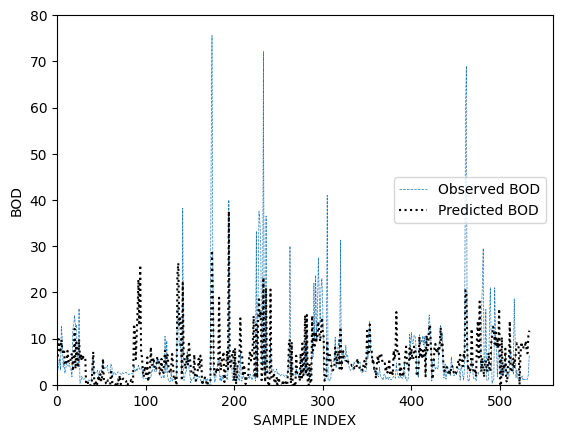

In [ ]:
style.use('default');
plt.plot(bod1['BOD'],label='Observed BOD',linestyle='dashed',linewidth=0.5);
plt.plot(bod1['Predicted'],label='Predicted BOD',c='black',linestyle='dotted');
plt.xlabel('SAMPLE INDEX');
plt.ylabel('BOD');
plt.xlim(0,None);
plt.ylim(0,80);
plt.legend();
plt.savefig('hydrograph.eps', format='eps');
plt.plot()

In [ ]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(bod1.BOD, bod1.Predicted)
rmse = mean_squared_error(bod1.BOD,bod1.Predicted, squared = False)
print("The MSE is:", mse ,"and the RMSE is:",rmse)

The MSE is: 45.51244840404464 and the RMSE is: 6.746291455610604


In [ ]:
from sklearn.metrics import r2_score
R2=r2_score(bod1.BOD,bod1.Predicted)
R2

0.3617784016783968

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


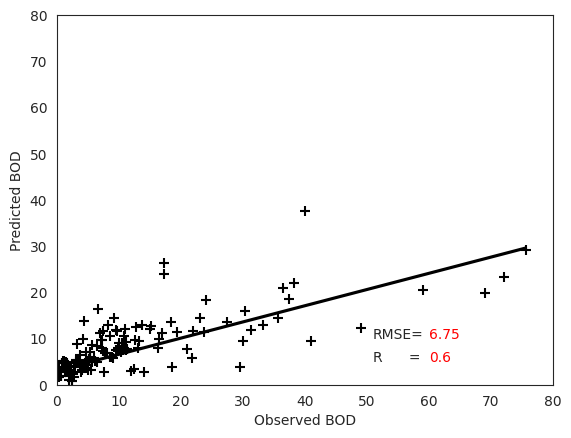

In [ ]:
sns.set_style('white');
sns.regplot(bod1['BOD'],bod1['Predicted'],ci=None,x_jitter=0.1,y_jitter=0.1,x_estimator=np.mean,robust=True,color='black',marker='+');
plt.ylim(0,80);
plt.xlim(0,80);
plt.text(51,10,'RMSE=');
plt.text(60,10,round(rmse,2),color='red');
plt.text(51,5,'R      =');
plt.text(60,5,round(math.sqrt(R2),2),color='red');
plt.ylabel('Predicted BOD');
plt.xlabel('Observed BOD');
plt.savefig('scater.eps', format='eps')



***BEST RESULTS WITH TEST DATA OF 10%**

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

0.8451048549567592 [-2.39946690e+00  4.22648524e-01  4.90292179e-05 -2.77772272e-07] 19.526678821617452
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

0.8674619013323599 [-2.38618466e+00  4.66539998e-01  8.29310936e-05  2.33593364e-07] 19.41735624368349

Time is:73.5 minutes

0.8746788009680014 [-2.30493872e+00  4.88162418e-01  8.93854304e-05  2.46817374e-07] 18.791825457913998
289.24 minutes

0.8746788009680014 [-2.40627538e+00  4.72288196e-01  7.72547844e-05  2.31681433e-07] 19.44110116213959 5247.964993953705



**BEST RESULTS WITH TEST DATA OF 20%**

0.6795249998599242 [-1.97823918e+00  6.01791334e-01  8.54165410e-05  2.99518531e-07] 16.593190573526176

.7012380182022052 [-2.41069846e+00  5.08106211e-01  7.52126920e-05  6.64259709e-07] 19.38393618144034

Time is:68.75 minutes

In [ ]:
model_results

{'loadings':          TEMP        pH        DO  CONDUCTIVITY       BOD  \
 PC1  0.114286 -0.561666 -0.088128      0.163096  0.569927   
 PC2  0.661805 -0.134170  0.186363      0.404647 -0.264595   
 PC3 -0.089545 -0.084175 -0.577292     -0.343859 -0.144698   
 PC4 -0.193298 -0.009250  0.782199     -0.300595 -0.010632   
 PC5 -0.633749  0.095460 -0.002400      0.675233  0.091167   
 PC6 -0.146919 -0.023448  0.032063     -0.363921  0.137903   
 PC7  0.062279  0.531259 -0.105637      0.109164 -0.284699   
 PC8  0.276528  0.606184 -0.014435     -0.027736  0.689739   
 
      NITRATE_N_NITRITE_N  FECAL_COLIFORM  TOTAL_COLIFORM  
 PC1             0.399709        0.244982        0.304144  
 PC2             0.219923       -0.470945       -0.073317  
 PC3             0.131558       -0.551130        0.437495  
 PC4             0.147222       -0.211559        0.440242  
 PC5             0.119660       -0.332567       -0.008576  
 PC6             0.591797       -0.198119       -0.660232  
 PC7    